### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

<font color=#3373FF>
The independent variable is the condition (either the congruent or incongruent conditions) and the dependent variable is the time it takes to name the ink colors in equally-sized lists.
</font>

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

<font color=#3373FF>
$$H_{0}: \mu_{incon} - \mu_{con} \leq 0$$
$$H_{1}: \mu_{incon} - \mu_{con} > 0$$
<br>
The null hypothesis is that the mean reaction time for the incongruent condition is less than or equal to that of the congruent condition.  The alternative hypothesis is that the mean reaction time is longer in the incongruent condition.  
<br>
The statistical test I expect to perform is a one-sided paired t-test.  Because I have prior knowledge of the Stroop effect I am interested in testing the statistical significance in one direction (whether the incongruent condition results in longer reactions times).  If this was the first time this test was being performed, we did not know what to expect, and did not want to miss a potential beneficial effect of the incongruent condition, we would perform a two-sided test.  We will perform a paired test because each participant is tested in both conditions and thus the results are paired per participant.
</font>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [55]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
% matplotlib inline

# Load data and look at first few lines

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [9]:
# Obtain some useful descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [10]:
# Obtain the median for each column
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

<font color=#3373FF>
The mean and median are 14.1 and 14.4 for the congruent data, and 22.0 and 21.0 for the incongruent data.  Given that the mean and median are close together, I expect both histograms to appear normally distributed opposed to skewed in one direction or the other.
<br>
<br>
As a single measure of variability, the standard deviation is 3.6 and 4.8 for the congruent and incongruent data respectively.  Moreover, the 5 number summary is shown in the output above for each group.  The range is 8.6 - 22.3 for the congruent data and 4.8 - 35.3 for the incongruent data.
</font>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

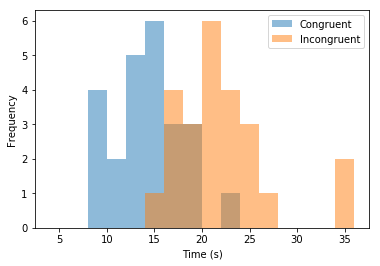

In [54]:
# Plot a histogram to show the distribution of the data
x = df['Congruent']
y = df['Incongruent']

plt.hist(x, bins = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36], alpha=0.5, label='Congruent')
plt.hist(y, bins = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36], alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.show()

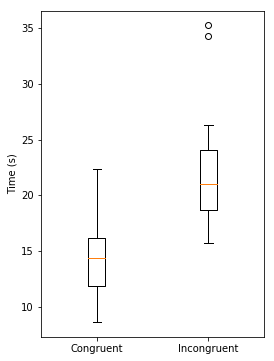

In [52]:
# Plot a boxplot to show the distribution of the data
x = df['Congruent']
y = df['Incongruent']

fig = plt.figure(1, figsize=(4,6))
ax = fig.add_subplot(111)
bp = ax.boxplot([x, y])
ax.set_xticklabels(['Congruent', 'Incongruent'])
ax.set_ylabel('Time (s)')
plt.show()

<font color=#3373FF>
From the histogram we can tell that the Incongruent data is shifted to the right (longer time) compared to the Congruent data.  The bin with the highest frequency is 20-22 for the Incongruent data and 14-16 for the Congruent data.  However, there is still overlap between the two groups and we must perform a statistical test to determine if the groups are significantly different.
<br>
<br>
The boxplot also shows that the time for the Incongruent data is on average larger than the time for the Congruent data.  The Incongruent data has 2 outliers above the boxplot, while the Congruent group does not have any outliers.  Again, there is overlap between the conditions.
</font>

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [60]:
# Perform the statistical test here
print(stats.ttest_rel(df['Congruent'], df['Incongruent']))

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


<font color=#3373FF>
The stats.ttest_rel function is a two-sided paired t-test.  Given that we want to perform a one-sided paired t-test we can recalculate the p value to be p/2 or 4.10e-08/2 = 2.05e-08, and the t-statistic is -8.02.  Give a significance level of $\alpha$ = 0.05 and a critical value of -1.714, we reject the null hypothesis in favor of the alternative hypothesis.  Therefore we conclude that the Incongruent test condition increases reaction time compared to th congruent test condition.  This is as expected since this phenomenon is well-known. 
</font>

#### Resources

